# S08 T01: Tasca Feature Engineering
## Luis Pardina - Data Science - 19/05/2022

#### *Exercici 1*: Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

Importo les eines que utilitzaré al llarg de l'exercici. A banda dels mòduls *habituals* (pandas, numpy, matplotlib.pyplot i seaborn) del sklearn importo les Classes per a estandarditzar (StandardScaler, RobustScaler), transformar (PowerTransformer) i normalitzar (MinMaxScaler) i per a fer un anàlisi de components principals (PCA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

from sklearn.decomposition import PCA

Continuaré amb la base de dades d'escaladors que vaig utilitzar als tres sprints anteriors.

Repeteixo, per a refrescar la memòria i facilitar la correcció de l'exercici, el resum del contingut i característiques de la base de dades:

A més de nacionalitat, sexe(0 o 1), alçada en cm, pes en kg i edat de l'escalador (user_id) hi ha aquests altres camps:

    years_cl -> years climbing
    date_first -> date of the first ascension
    date_last -> date of the last ascension
    grades_count -> number of routes done by climber
    grades_first -> grade of the first ascension
    grades_last -> grade of the last ascension
    grades_max -> biggest grade achieved by climber in an ascension
    grades_mean -> average of the grades of the climber in ascensions
    year_first -> year of the first ascension
    year_last -> year of the last ascension

El grade indica la dificultat de l'ascensió, és un número ordinal correlatiu de petit a gran que es correspon amb l'escala del sistema francès de graduació. Aquest sistema considera la dificultat total de l'escalada. Els graus comencen per l'1 i el sistema no té límit superior.

La base de dades té prop d'11.000 registres. No hi ha camps nuls. Excepte el pais i els camps date_first i date_last, són tots camps numèrics.

Hi ha tres registres on el camp year_first té un valor inconsistent (0, 0, 1095). A més, només en 192 dels registres hi ha coincidencia entre els valors de years_cl (els anys que l'escalador duu fent ascensions) i la diferencia entre year_last (any de la darrera escalada) i year_first (any de la primera escalada). Aquests dos darrers camps semblen extrets de date_first i date_last.

In [2]:
pd.set_option('display.max_columns',None)
escaladors = pd.read_csv('climber_df.csv')

In [3]:
escaladors.head(5)

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


Resumeixo el pla que seguiré a aquesta tasca: 
1. Faré tres grups d' atributs en tres grups. 
    * El primer grup, atributs categòrics, els normalitzaré amb dummies.
    * El segon grup, atributs numèrics que segueixen una distribució aproximadament normal, els estandarditzaré.
    * El tercer grup, atributs numèrics que clarament no segueixen una distribució normal, els normalitzo.
2. A tots els atributs numèrics els aplico l'anàlisi de components principals per a reduïr el nombre.
3. Analitzo a quins atributs tinc més outliers i sobre aquests atributs hi aplico diferents técniques de transformació per a comparar els resultats.
4. Per a acabar, faig una nova dataframe un cop realitzada la feature engineering. Aquesta seria com la dataframe sobre la que hi aplicariem el machine learning.

D'atributs categòrics per a normalitzar amb dummies només en tinc un, la nacionalitat de l'escalador.

In [4]:
dummies = pd.get_dummies(escaladors['country'], prefix = 'country_')
dummies

,country__AUS,country__AUT,country__BEL,country__BRA,country__CAN,country__CHE,country__CZE,country__DEU,country__DNK,country__ESP,country__FIN,country__FRA,country__GBR,country__HRV,country__ITA,country__MEX,country__NLD,country__NOR,country__POL,country__PRT,country__RUS,country__SVN,country__SWE,country__USA,country__ZAF,country__other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Els atributs numèrics els presento en histograma.

Veig que tots segueixen una distribució aproximadament normal, amb l'excepció de grades_count. Aquest el normalitzo i els altres els estandarditzo.

Els histogrames de primer grau, darrer grau i grau maxim presenten una forma estranya. Aixó es degut al sistema francés de graduació de les escalades: es pot assignar la dificultat de la ascensió a un grau general que es un número i una lletra (p. exemple, 4c) però després afegir-li un plus o dos (p. exemple, 4c+ o 4c++). Aquestes ascensions amb grau de dificultat una mica particulars son les que provoquen aquesta distorsió als histogrames. Per corregir-ho amb vistes a l'anàlisi, vaig a fer una agrupacions en grups de 2.

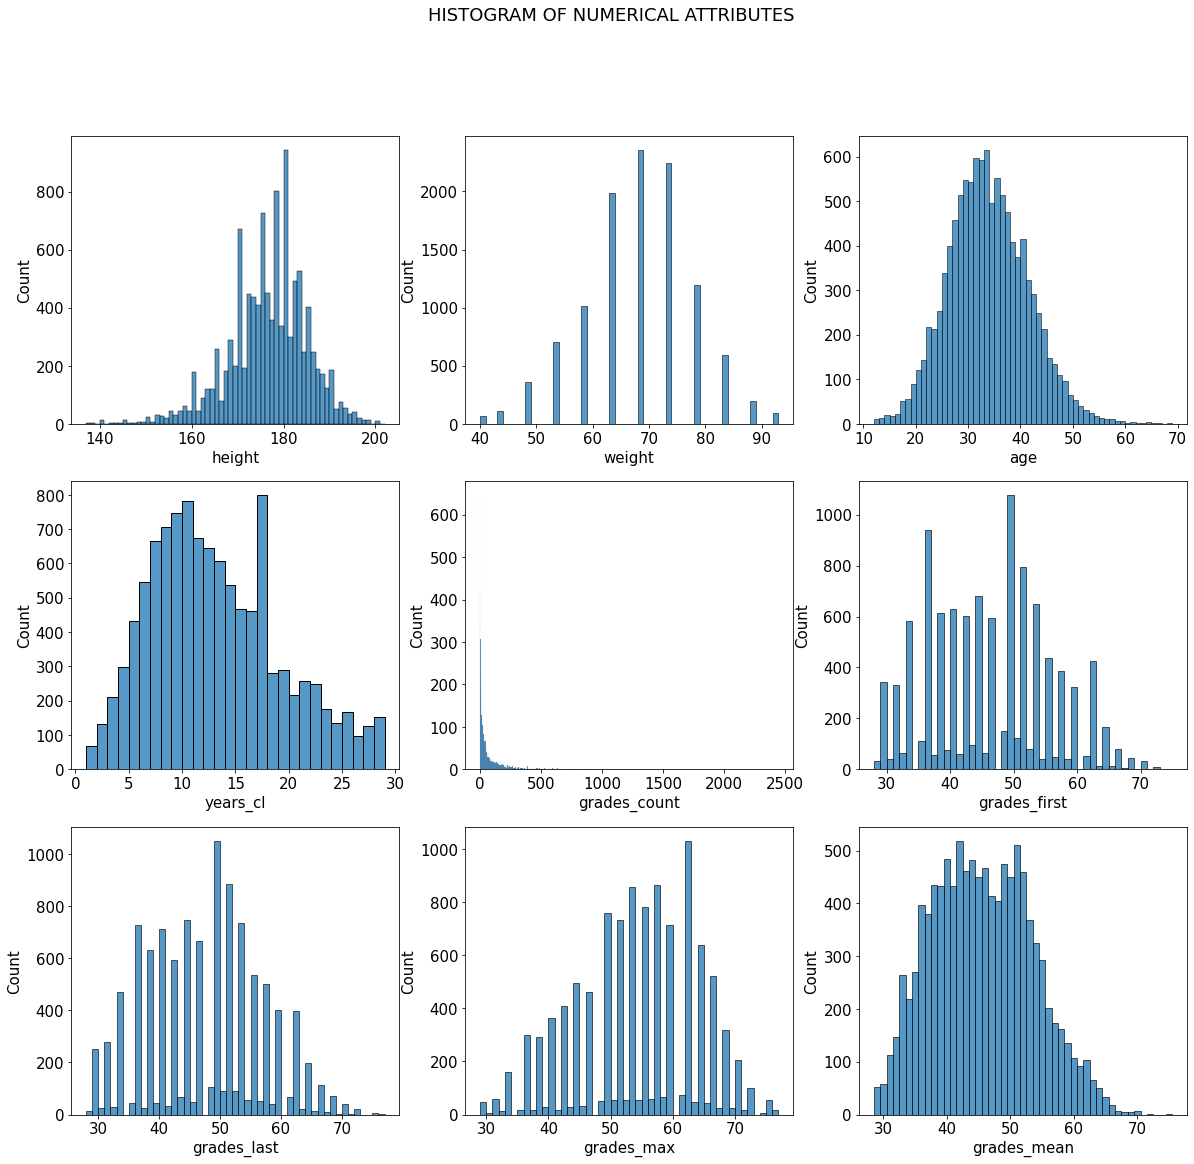

In [5]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 18)})
plt.subplot(3,3,1)
sns.histplot(data=escaladors, x='height', binwidth=1)
plt.subplot(3,3,2)
sns.histplot(data=escaladors, x='weight', binwidth=1)
plt.subplot(3,3,3)
sns.histplot(data=escaladors, x='age', binwidth=1)
plt.subplot(3,3,4)
sns.histplot(data=escaladors, x='years_cl', binwidth=1)
plt.subplot(3,3,5)
sns.histplot(data=escaladors, x='grades_count', binwidth=1)
plt.subplot(3,3,6)
sns.histplot(data=escaladors, x='grades_first', binwidth=1)
plt.subplot(3,3,7)
sns.histplot(data=escaladors, x='grades_last', binwidth=1)
plt.subplot(3,3,8)
sns.histplot(data=escaladors, x='grades_max', binwidth=1)
plt.subplot(3,3,9)
sns.histplot(data=escaladors, x='grades_mean', binwidth=1)
plt.suptitle("HISTOGRAM OF NUMERICAL ATTRIBUTES");

In [6]:
escaladors.grades_first = escaladors.grades_max//2
escaladors.grades_last = escaladors.grades_last//2
escaladors.grades_max = escaladors.grades_max//2

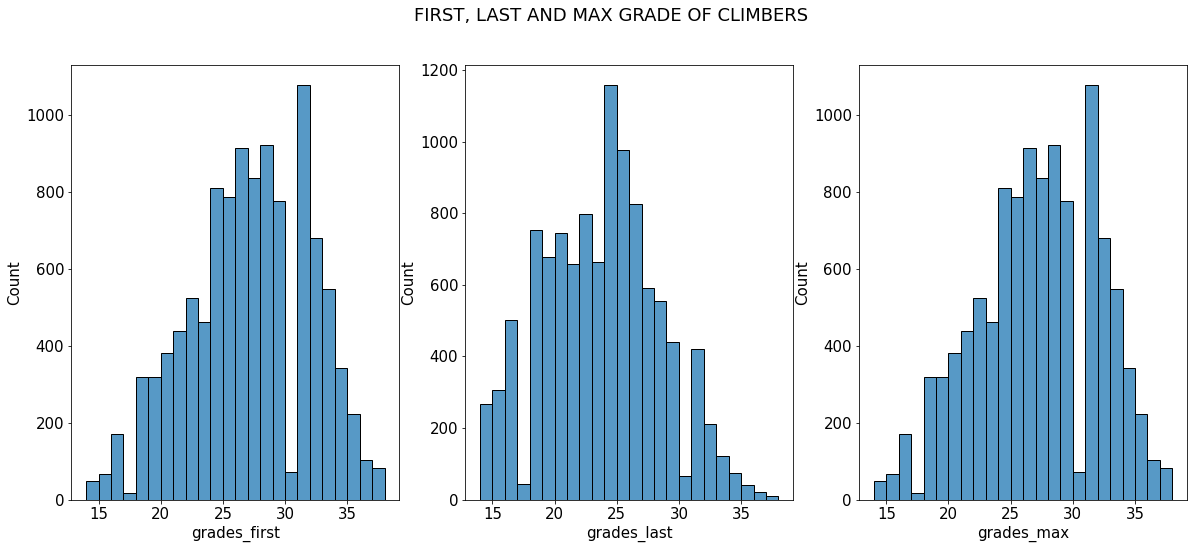

In [8]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 8)})
plt.subplot(1, 3, 1)
plt.suptitle("FIRST, LAST AND MAX GRADE OF CLIMBERS")
sns.histplot(data=escaladors, x='grades_first', binwidth=1)
plt.subplot(1, 3, 2)
sns.histplot(data=escaladors, x='grades_last', binwidth=1)
plt.subplot(1, 3, 3)
sns.histplot(data=escaladors, x='grades_max', binwidth=1);

In [9]:
standardized = ['height','weight','age','years_cl','grades_first','grades_last','grades_max','grades_mean']
normalized = ['grades_count']
X1 = escaladors[standardized]
X2 = escaladors[normalized]

ss = StandardScaler()
mms = MinMaxScaler()

Xss = ss.fit_transform(X1)
Xmms = mms.fit_transform(X2)

Visualitzo amb un boxplot les variables abans i després de la estandarització. Es fa visible com després és més senzill comparar-les i treure'n conclusions.

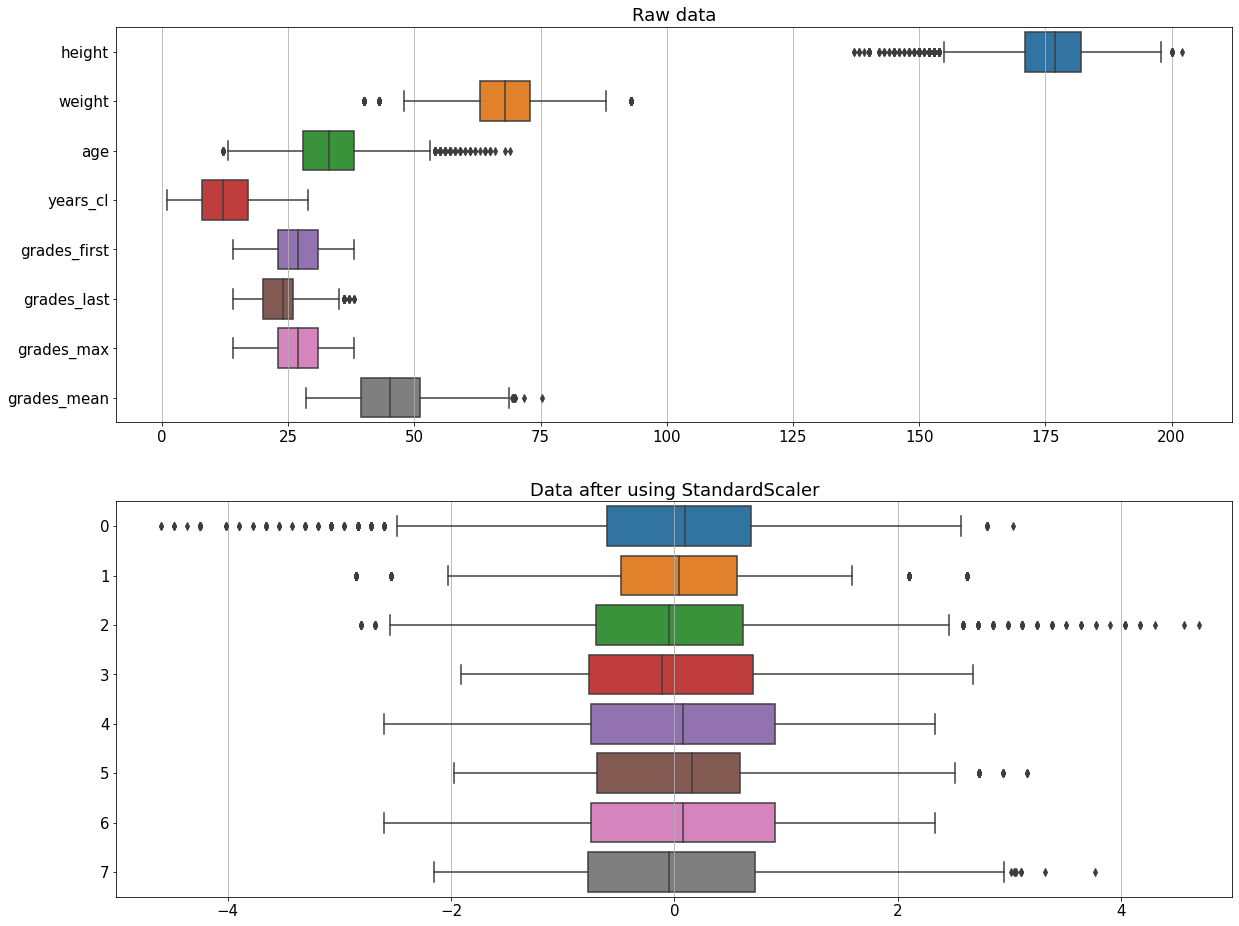

In [10]:
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
sns.boxplot(data=X1, orient='h');
plt.title('Raw data')
plt.grid(axis='x')

plt.subplot(2,1,2)
sns.boxplot(data=Xss, orient='h');
plt.xlim(-5.0, 5.0);
plt.title('Data after using StandardScaler')
plt.grid(axis='x');


El mateix per a la variable normalitzada:

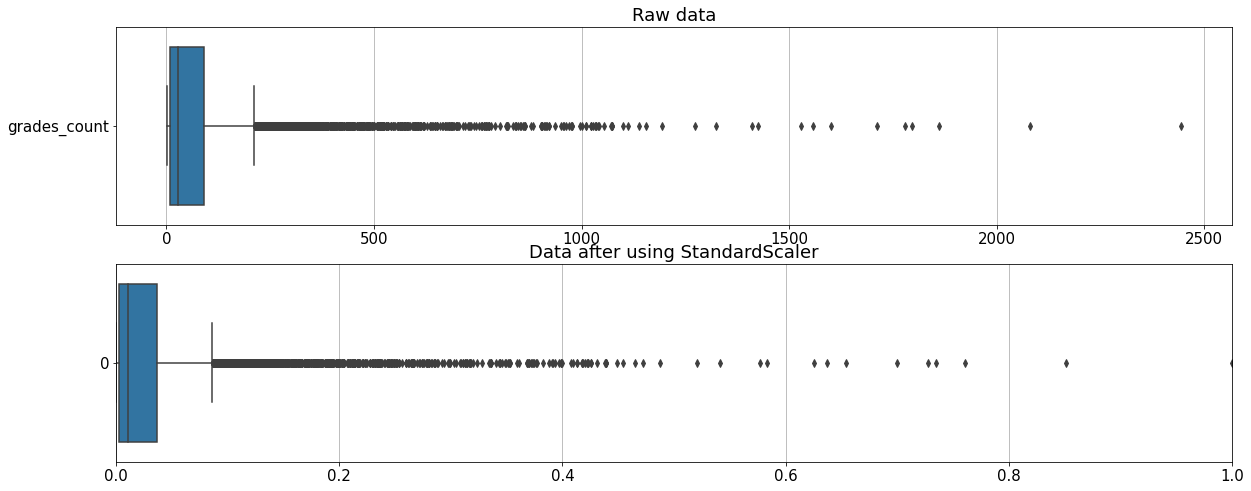

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
sns.boxplot(data=X2, orient='h');
plt.title('Raw data')
plt.grid(axis='x')

plt.subplot(2,1,2)
sns.boxplot(data=Xmms, orient='h');
plt.xlim(0, 1);
plt.title('Data after using StandardScaler')
plt.grid(axis='x');

Anem amb compte perque tant Standard Scaler como MinMaxScaler retornen numpy arrays. Ara integrarem els atributs dummies, els estandaritzats i el normalitzat a una mateixa dataframe:

In [12]:
type(Xss)

numpy.ndarray

Primer junto l'user id i les dummies:

In [13]:
escaladors_engineered = escaladors.iloc[:,0]
escaladors_engineered = pd.concat([escaladors_engineered,dummies], axis=1)

Ara hi afegeixo el camp de sexe:

In [14]:
escaladors_engineered = pd.concat([escaladors_engineered,escaladors.iloc[:,2]], axis=1)

Ara les variables estandarditzades:

In [15]:
standard_names=[]
for i in standardized:
    standard_names.append("stand_"+i)
escaladors_engineered = pd.concat([escaladors_engineered, pd.DataFrame(Xss, columns=standard_names)], axis=1)

I per acabar la variable normalitzada:

In [16]:
normalized_names = ['norm_grades_count']
escaladors_engineered = pd.concat([escaladors_engineered, pd.DataFrame(Xmms, columns=normalized_names)], axis=1)

In [17]:
escaladors_engineered

,user_id,country__AUS,country__AUT,country__BEL,country__BRA,country__CAN,country__CHE,country__CZE,country__DEU,country__DNK,country__ESP,country__FIN,country__FRA,country__GBR,country__HRV,country__ITA,country__MEX,country__NLD,country__NOR,country__POL,country__PRT,country__RUS,country__SVN,country__SWE,country__USA,country__ZAF,country__other,sex,stand_height,stand_weight,stand_age,stand_years_cl,stand_grades_first,stand_grades_last,stand_grades_max,stand_grades_mean,norm_grades_count
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.099667,0.557135,1.009947,1.363389,0.898557,0.805053,0.898557,0.157768,0.033961
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.452264,1.073831,1.405171,1.527104,0.486904,0.376849,0.486904,0.928689,0.004501
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,-1.310724,-0.992953,-0.043982,0.544813,1.104383,0.162747,1.104383,1.062693,0.048282
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.075659,-0.476257,2.459100,2.018249,0.898557,0.162747,0.898557,0.494359,0.121522
4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.099667,0.040439,1.405171,1.363389,-0.130575,0.162747,-0.130575,0.747047,0.001637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,66987,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.097720,1.590527,-0.043982,-1.256053,-0.542227,-0.265457,-0.542227,-0.739880,0.010638
10923,66988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.804862,1.073831,-1.493135,-1.910914,-2.188838,-1.978274,-2.188838,-1.901542,0.000409
10924,67009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.310724,-0.476257,1.009947,1.199673,0.486904,-0.051355,0.486904,0.037377,0.013912
10925,67019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.487996,0.557135,-0.966170,-1.419768,-0.748053,-0.051355,-0.748053,-0.353665,0.002455


#### *Exercici 2*:  Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

Selecciono les 9 variables numèriques, un cop estandarditzades o normalitzades, i els hi aplico el PCA. Ho faré de dues maneres diferents per a observar els diferents resultats:
1. Primer forço jo tres components. Veig que el percentatge de variança explicat es només del 87%.
2. Després demano un explained_variance_ratio_ del 95%, i el resultat es que ens calen 5 components.

En resum, fora possible reduïr de 9 atributs a 5 components amb un bon percentatge de variança explicat.

In [18]:
Z = escaladors_engineered.iloc[:,28:37]
pca = PCA(n_components=3)
Z_pca = pca.fit_transform(Z)

In [19]:
v = pca.explained_variance_ratio_
v

array([0.47104603, 0.23474482, 0.16757367])

In [20]:
sum(v)

0.8733645215694683

In [21]:
pca = PCA(.95)

In [22]:
Z_pca = pca.fit_transform(Z)

In [23]:
pca.n_components_

5

In [24]:
v = pca.explained_variance_ratio_
v

array([0.47104603, 0.23474482, 0.16757367, 0.04666934, 0.03391737])

In [25]:
sum(v)

0.9539512302850393

Aquesta es la dataframe amb les 5 components del PCA:

In [26]:
var_pca=[f'PCA_{i}' for i in range(pca.n_components_)]
df_pca=pd.DataFrame(Z_pca, columns=var_pca)
df_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
0,1.554739,-1.293734,0.932359,-0.039979,0.117894
1,1.283379,-2.046221,1.028703,0.019771,-0.108340
2,1.961059,1.153741,0.886065,0.003162,0.632659
3,1.683834,-0.804777,3.064329,-0.513225,0.475325
4,0.565340,-1.128385,1.539413,0.131550,-0.421335
...,...,...,...,...,...
10922,-1.542075,-1.735709,-1.956687,-0.533317,-0.135959
10923,-4.529275,0.216894,-1.993584,0.393932,-0.043786
10924,0.819998,0.225548,1.925383,-0.075874,0.401458
10925,-1.259662,0.839497,-1.208983,-0.298601,-0.591189


In [33]:
df_pca.describe()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
count,1.092700e+04,1.092700e+04,1.092700e+04,1.092700e+04,1.092700e+04
mean,-4.327401e-16,-6.229218e-16,-1.564920e-15,-8.684064e-17,-4.373021e-17
std,1.941723e+00,1.370736e+00,1.158133e+00,6.111834e-01,5.210349e-01
min,-4.890526e+00,-4.397620e+00,-3.379480e+00,-2.894010e+00,-1.068334e+00
25%,-1.396099e+00,-9.245230e-01,-8.259366e-01,-3.712809e-01,-4.185639e-01
50%,4.346246e-02,-8.846537e-02,-7.196248e-02,4.134820e-03,-8.022622e-02
75%,1.422580e+00,8.189635e-01,7.560070e-01,3.881316e-01,3.197531e-01
max,5.689787e+00,5.971587e+00,5.367747e+00,2.958238e+00,2.930754e+00


#### *Exercici 3*: Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Quants outliers tinc als atributs numèrics del dataframe d'escaladors? Quin percentatge suposen del total?

La definició d'outlier és tot aquell valor que está per damunt del Q3 o per sota del Q1 més d' 1.5 vegades el rang interquartilic. 

Comprovo que la variable *grades_count* és la que te més outliers, una mica més de 1000 que suposa gairebé un 10% del total de dades. La treballaré una mica.

In [38]:
aux = escaladors[standardized+normalized]     #aquí ficats els 9 atributs numèrics
Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                 #rang interquartilic

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / aux.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
height           178
weight           275
age              100
years_cl           0
grades_first       0
grades_last       31
grades_max         0
grades_mean        9
grades_count    1075
dtype: int64

% of outliers vs total:
height          1.628992
weight          2.516702
age             0.915164
years_cl        0.000000
grades_first    0.000000
grades_last     0.283701
grades_max      0.000000
grades_mean     0.082365
grades_count    9.838016
dtype: float64


Ja hem vist abans gràficamente que grades_count no segueix una distribució normal, i la mitjana aritmetica (80) i la mediana (28) són prou diferents. Una interpretació d'aquesta informació és que dins del dataset s'han inclos mostres de poblacions que són diferents: per un costat gent que practica l'escalada com a hobby i per l'altra gent que fa una práctica professional (p.ex. guies de muntanya). La qual cosa podria explicar que hi hagi aquestes dades tan separades, amb persones que han fet milers! d'ascensions i una gran massa d'altres que només n'han fet un grapat.

La meva opinió és que no podem eliminar aquests outliers. Ara bé, podem veure si aplicant alguna mena de transformació es podria reduir el seu impacte.

Compararé quatre transformacions. Standard Scaler, MaxMinScaler que ja hem vist i hi afegeixo Robust Scaler y Power Transformer que diuen que són les més "robustes" davant dels outliers.
1. Standardització amb Standard Scaler
2. Standardització amb Robust Scaler
3. Transformació amb Power Transformer
4. Normalització

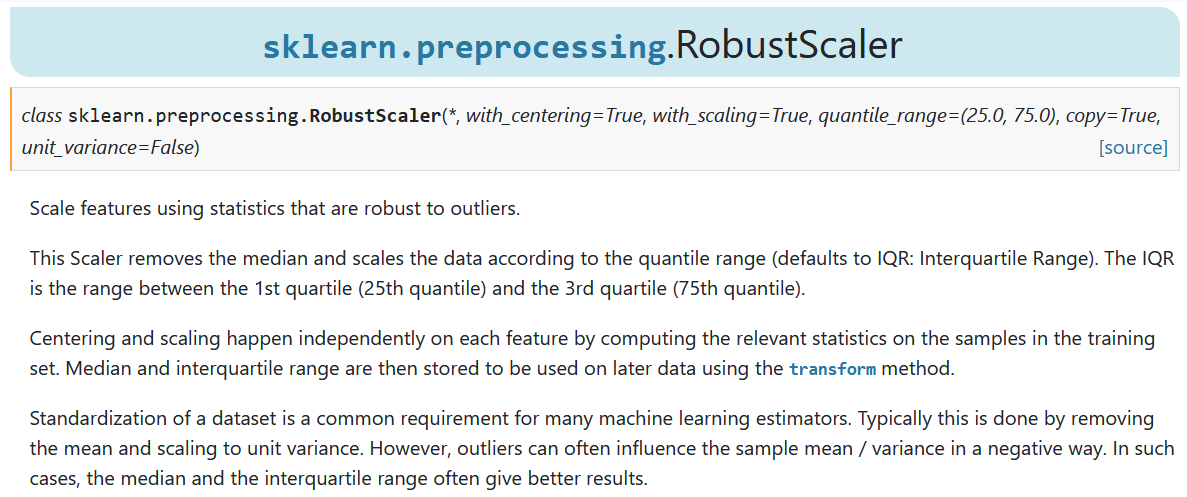

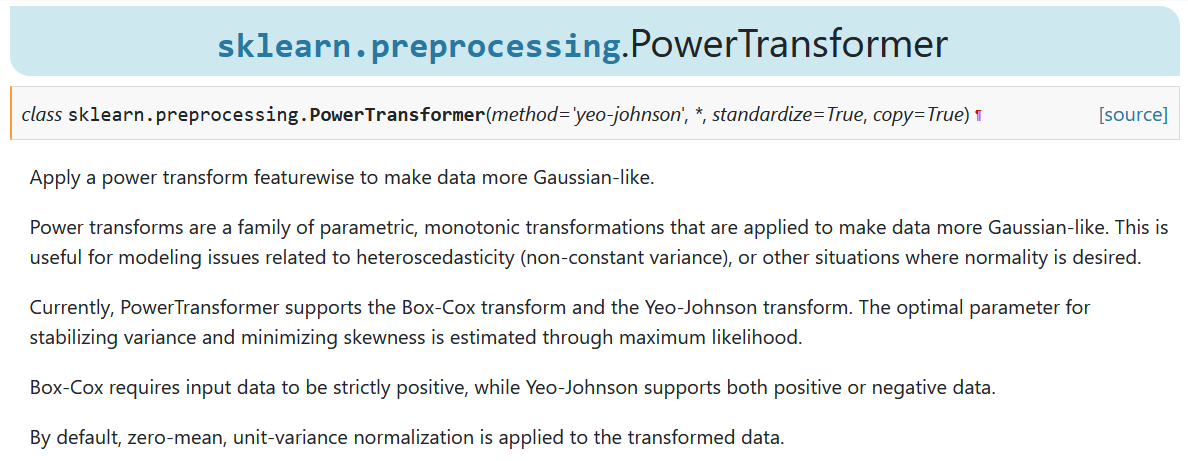

In [28]:
round(escaladors.grades_count.describe(),2)

count    10927.00
mean        79.79
std        141.41
min          1.00
25%          8.00
50%         28.00
75%         90.00
max       2445.00
Name: grades_count, dtype: float64

In [29]:
escaladors.grades_count.median()

28.0

In [30]:
Z = escaladors[['grades_count']]

rs = RobustScaler()
pt = PowerTransformer()

Zss = ss.fit_transform(Z)
Zrs = rs.fit_transform(Z)
Zpt = pt.fit_transform(Z)
Zmms = mms.fit_transform(Z)

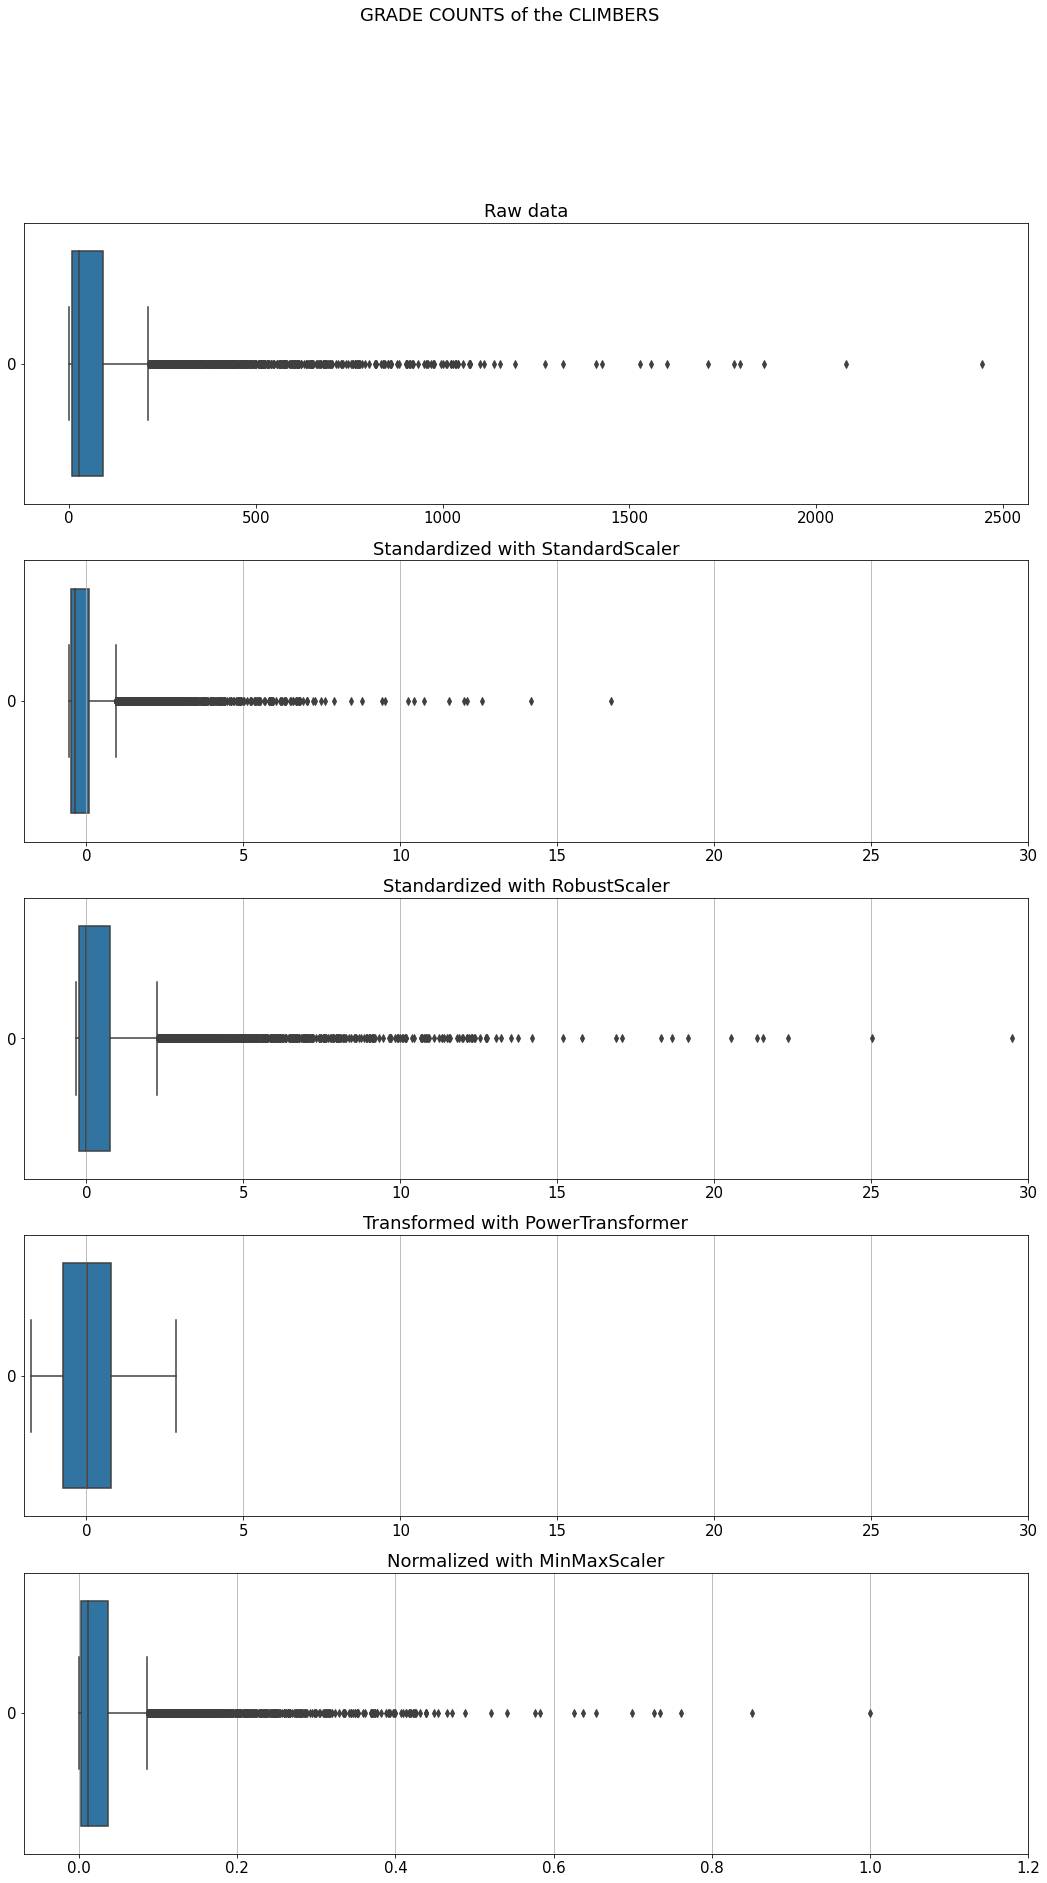

In [37]:
plt.figure(figsize=(18,30))

plt.subplot(5,1,1)
sns.boxplot(data=escaladors.grades_count, orient='h');
plt.title('Raw data')

plt.subplot(5,1,2)
sns.boxplot(data=Zss, orient='h')
plt.xlim(-2.0, 30)
plt.title('Standardized with StandardScaler')
plt.grid(axis='x')

plt.subplot(5,1,3)
sns.boxplot(data=Zrs, orient='h')
plt.xlim(-2.0, 30)
plt.title('Standardized with RobustScaler')
plt.grid(axis='x')

plt.subplot(5,1,4)
sns.boxplot(data=Zpt, orient='h')
plt.xlim(-2.0, 30)
plt.title('Transformed with PowerTransformer')
plt.grid(axis='x')

plt.subplot(5,1,5)
sns.boxplot(data=Zmms, orient='h')
plt.xlim(-0.07, 1.2)
plt.title('Normalized with MinMaxScaler')
plt.grid(axis='x')

plt.suptitle("GRADE COUNTS of the CLIMBERS");

La meva reflexió -comparant les gràfiques- és la següent: si he de ficar aquest atribut amb els altres -que estan estandaritzats-, per tal d'incorporar-lo a un machine learning triaria o bé la normalització o bé la transformació amb Power Transformer. Tots dos m'ajusten l'atribut a un rang més semblant al dels altres atributs. A favor de la normalització veig que respecta l'estructura original de l'atribut, i a favor del Power Transformer veig que es capaç de "normalitzar" l'atribut i deixar-lo sense outliers.

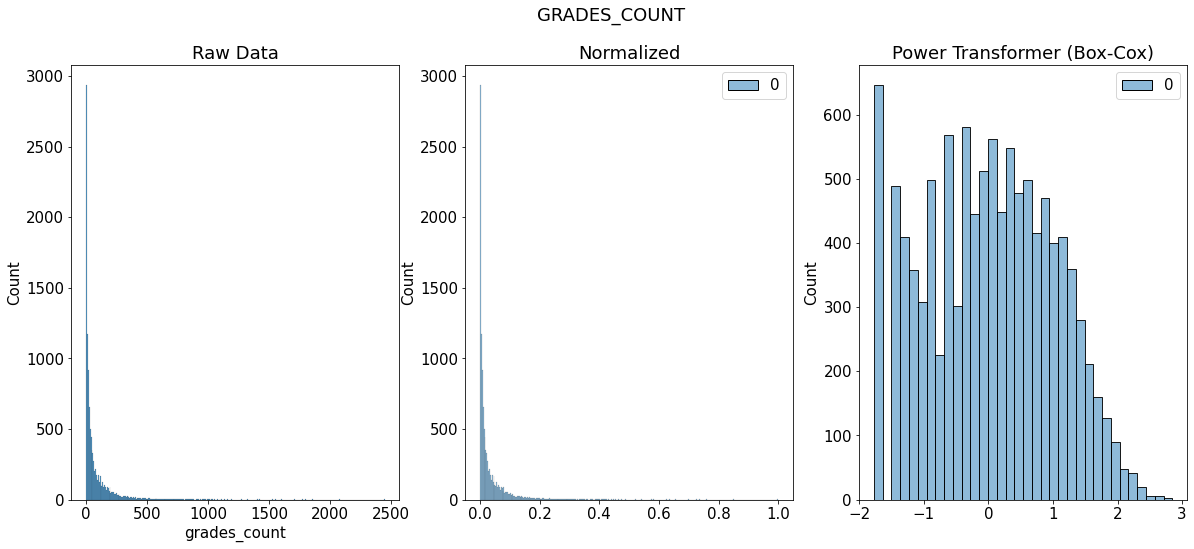

In [36]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 8)})
plt.suptitle("GRADES_COUNT")
plt.subplot(1, 3, 1)
sns.histplot(data=escaladors, x='grades_count')
plt.title('Raw Data')
plt.subplot(1, 3, 2)
sns.histplot(data=Zmms)
plt.title('Normalized')
plt.subplot(1, 3, 3)
sns.histplot(data=Zpt)
plt.title('Power Transformer (Box-Cox)');